# Exploratory Data Analysis of Titanic Survival Problem

## Part I - Analysis, Cleaning & Visualization

EDA is a statistical approach for visualizing and analyzing data before making up a hypothesis or modeling.
This is Part I of my series on Getting Started with Data Science.

1. Part I - EDA on Titanic Survival Problem
2. Part II - EDA on Hyderabad Housing Prices Prediction
3. Part III - Model Building, Evaluation, and Ensembling

In this write-up, we will explore Titanic - Machine Learning from Disaster competition from Kaggle. I present a summary of my analysis and insights in this blog. A detailed notebook containing a comprehensive study of the Titanic data is available at github - reyscode/start-datascience.

## Study of variables

First we will import the necessary packages and load the data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/titanic-train.csv')

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Above is the training data set of titanic survival problem. It has 891 rows (number of passengers), and 12 columns (data about the passeger) including the target variable "Survived".

Let us first look at the columns of the data and then we use describe() and info() methods to get a basic idea of what we have in hand.

In [3]:
cols = df.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let us look at the data row-wise and try to understand.

Count: The first-row 'count' is the number of entries in that particular column 'PassengerID'. It shows 891(equal to the number of passengers), which means 'PassengerID' is available for all the passengers. Except 'Age', all other data are available for each passenger. We gotta do something to fix the missing values in the 'Age' column.

Mean: Mean of all data. Let's consider the 'Fare' column. The average 'Fare' of the passenger is USD 32.20

Std: Standard deviation of all data. A low standard deviation means that most of the numbers are close to the average, while a high standard deviation means that the numbers are more spread out. Again 'Fare' has a high standard deviation. 

Min: Minimum value of the column. For example, the lowest 'Fare' shows USD 0, which means 'Fare' is unavailable for some passengers. The model may not perform well with 0 for some passengers. Hence we will need to focus on the 'Fare' column before modeling.

Max: Maximum value of the column. For example, the highest 'Fare' shows USD 512.33. The mean of the 'Fare' column says USD 32.20. We see there is a huge difference in fare. It could be because of the 'Pclass' they were traveling.

25%, 50% & 75%: 1st, 2nd, and 3rd quartile of the data. Quartile in statistics is a type of quantile that divides the number of ordered data points into four equal groups. 1st quartile is the middle number between the smallest number and the median. 2nd quartile is the median of the dataset. 3rd quartile is the middle value between the median and the highest value.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Using info() method, we get the Dtype of the data, Non-null count and memory usage. To get the total null values of the data we have to use isnull() method.

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We already know that there are 177 missing values in the age column. From the above results, we see that there are 687 missing values in 'Cabin' and 2 missing vaues in 'Embarked'. We need to fix these null values before we move on to modeling.

Now lets see the heatmap of the null values.

<AxesSubplot:>

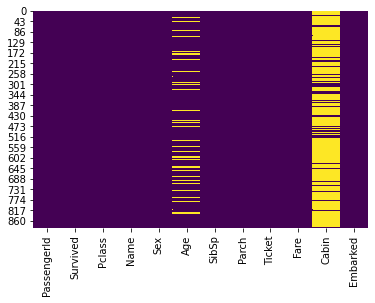

In [7]:
sns.heatmap(df.isnull(), cmap = 'viridis', cbar=False)

Since 'Embarked' column has only 2 null values, its not visible in the heatmap.

# Cleaning Null Values

Since 'Cabin' column has got more NaN values, lets fix it first. The cabin column has the cabin number of the passenger or NaN for those who didn't have one. Lets create a new column 'HasCabin' which has 1 if there is a cabin and 0 for NaN.

In [8]:
def create_feat_has_cabin(df, colname):
    # if NA => 0 else 1
    def _is_nan(x):
        if isinstance(x, type(np.nan)):
            return 0
        return 1
        
    return df[colname].apply(_is_nan)
    
df['HasCabin'] = create_feat_has_cabin(df, 'Cabin')

Now, lets fill NA values of Embarked column with 'S'(Southampton)

In [9]:
def fill_na_embarked(df, colname):
    
    return df[colname].fillna('S')
    
df['Embarked'] = fill_na_embarked(df, 'Embarked')

Similarly, the Age column has a lot of missing values. Hence we fill the missing values with random values centered around mean and (spread out) distributed with standard deviation, sd. Let's get the mean and standard deviation first.

In [38]:
mean = df['Age'].mean()
sd = df['Age'].std()
print(mean,sd)

29.48260381593715 13.5330839040515


The mean of the dataset is 29.48 and the standard deviation of the dataset is 13.53. Hence we fill the missing values by choosing a random number between 16 and 43.

In [34]:
def fill_na_age(df, colname):
    mean = df['Age'].mean()
    sd = df['Age'].std()
    def fill_empty(x):
        if np.isnan(x):
            return np.random.randint(mean-sd, mean+sd, ())
        return x
    return df[colname].apply(fill_empty).astype(int)

df['Age'] = fill_na_age(df, 'Age')

29.48260381593715 13.5330839040515


In [37]:
mean = df['Age'].mean()
sd = df['Age'].std()
print(mean,sd)

29.48260381593715 13.5330839040515


## Feature Engineering

We have filled all the missing values in our data. In this section, we put on our creative hats and think up new features that could help our yet-be-built model's performance.

First, let's create a new column 'FamilySize' by combining 'SibSp'(Sibling & Spouse) and 'Parch'(Parent & Children).

In [11]:
def create_feat_familly_size(df):
    return df['SibSp'] + df['Parch'] + 1
    
df['FamilySize'] = create_feat_familly_size(df)

Ok done! 

What about the ones traveling solo? We create a new column named 'IsAlone' with 0 and 1.

In [12]:
def create_feat_isalone(df, colname):
    def _is_alone(x):
        if x==1:
            return 1
        return 0
    
    return df[colname].apply(_is_alone)
    
df['IsAlone'] = create_feat_isalone(df, 'FamilySize')

As we have seen earlier, Fare column contains 0's for some passenger and too high values for some passengers. So lets split the fare into four categories and store it in a new column "CategoricalFare"

In [13]:
def create_feat_categoricalFare(df, colname):
    return pd.qcut(df[colname], 4, labels = [0, 1, 2, 3]).astype(int)

df['CategoricalFare'] = create_feat_categoricalFare(df, 'Fare')

We have already filled the missing values of Age. Now lets categorize the age into 5 categories and store it into a new column "CategoricalAge"

In [14]:
def create_feat_categoricalAge(df, colname):
    return pd.qcut(df[colname], 5, labels = [0, 1, 2, 3, 4]).astype(int)

df['CategoricalAge'] = create_feat_categoricalAge(df, 'Age')

Done!

Now lets look at the Name column. We have many titles ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess','Jonkheer']. So lets extract the title from each name and categorize the titles into four categories namely Mr, Miss, Mrs and Rare and store it in a new column 'Title'.

In [15]:
import re

def create_feat_title(df, colname):
    def find_title(x):
        title_search = re.search(' ([A-Za-z]+)\.', x)
        if title_search:
            title = title_search.group(1)
            if title in ['Mlle', 'Ms']:
                return 'Miss'

            elif title in ['Mme', 'Mrs']:
                return 'Mrs'
            elif title=='Mr':
                return 'Mr'           
            else:
                return 'Rare'
        return ""
    
    return_title= df[colname].apply(find_title)
    dict_title = {'Miss': 1, 'Mrs':2, 'Mr':3, 'Rare':4}
    return return_title.replace(dict_title)
    

df['Title'] = create_feat_title(df, 'Name')

Now we change the 'Sex' column values of 'Male' and 'Female' to 1 and 0 and store it in a new column 'SexNumerical'. But why? Machine Learning algorithms operate in the domain of numerical values. They do not understand "Male/Female" or "Yes/No". But they understand the difference between a 0 and a 1.

For the same reason, lets change the values of Embarked column also to numerical.

In [16]:
def create_feat_sex(df, colname):
    def sex(x):
        if x=='male':
            return 1
        return 0
    
    return df[colname].apply(sex)
    
df['SexNumerical'] = create_feat_sex(df, 'Sex')

In [17]:
df['Embarked'] = df.Embarked.replace({'S': 0, 'C' : 1, 'Q' : 2})

Alright, we are done with Data Cleaning and Feature Engineering. Let's check if there are any more null values present in the data frame.

In [18]:
df.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
HasCabin             0
FamilySize           0
IsAlone              0
CategoricalFare      0
CategoricalAge       0
Title                0
SexNumerical         0
dtype: int64

We can ignore the missing value in the Cabin since we have already created a new column 'HasCabin'. Time to drop the useless columns.

In [19]:
drop_list = ['PassengerId', 'Cabin', 'Ticket', 'SibSp', 'Name']
titanic = df.drop(drop_list, axis=1)

## Correlation Study

We are done with Data Cleaning and Pre-processing. 

Before visualizing the dataset, lets see the correlation between the variables.

In [20]:
corrmat = titanic.corr()
corrmat

,Survived,Pclass,Age,Parch,Fare,Embarked,HasCabin,FamilySize,IsAlone,CategoricalFare,CategoricalAge,Title,SexNumerical
Survived,1.000000,-0.338481,-0.055292,0.081629,0.257307,0.106811,0.316912,0.016639,-0.203367,0.299357,-0.022501,0.030949,-0.543351
Pclass,-0.338481,1.000000,-0.317449,0.018443,-0.549500,0.045702,-0.725541,0.065997,0.135207,-0.634271,-0.281099,0.075428,0.131900
Age,-0.055292,-0.317449,1.000000,-0.166152,0.086269,0.017972,0.232164,-0.235266,0.161746,0.067659,0.924395,-0.303090,0.071831
Parch,0.081629,0.018443,-0.166152,1.000000,0.216225,-0.078665,0.036987,0.783111,-0.583398,0.393881,-0.111560,0.021398,-0.245489
Fare,0.257307,-0.549500,0.086269,0.216225,1.000000,0.062142,0.482075,0.217138,-0.271832,0.579345,0.079621,0.021076,-0.182333
Embarked,0.106811,0.045702,0.017972,-0.078665,0.062142,1.000000,0.013774,-0.080281,0.017807,-0.098161,0.008343,0.121285,-0.116569
HasCabin,0.316912,-0.725541,0.232164,0.036987,0.482075,0.013774,1.000000,-0.009175,-0.158029,0.500936,0.206985,-0.045148,-0.140391
FamilySize,0.016639,0.065997,-0.235266,0.783111,0.217138,-0.080281,-0.009175,1.000000,-0.690922,0.465396,-0.171175,0.101470,-0.200988
IsAlone,-0.203367,0.135207,0.161746,-0.583398,-0.271832,0.017807,-0.158029,-0.690922,1.000000,-0.560279,0.102140,0.074505,0.303646
CategoricalFare,0.299357,-0.634271,0.067659,0.393881,0.579345,-0.098161,0.500936,0.465396,-0.560279,1.000000,0.083551,-0.045563,-0.243613


Positive and Negative values denote Positive and Negative correlation. The first row of the data shows the correlation of each variable with the Target variable 'Survived'.

For building a good predictive model, we are interested in variables that influence the target variable "Survived". Positively or negatively. We need to consider the values that are both too high and too low.

Let us take a look at the beautiful correlation heatmap rendered using the amazing and succinct seaborn.

<AxesSubplot:>

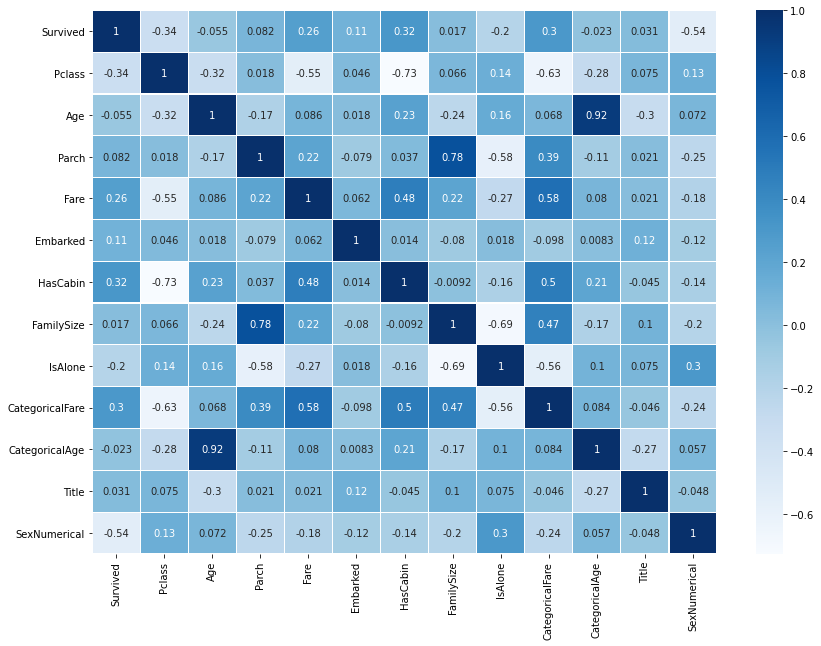

In [21]:
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(titanic.corr(), cmap=colormap, annot=True, linewidths=0.2)

The top row values are the correlation of each variable with the target variable. 'HasCabin' and 'CategoricalFare' are highly correlated with the target variable and 'Sex Numerical' is highly negatively correlated with target variable.

## Target Variable Analysis (Univariate Analysis)

The Study of the target variable is a significant step in Data Analysis that reveals the nature and distribution of the variable. Let's analyze our target variable "Survived".

In [22]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

From the above result, 342 out of 891 passengers in the training data are survived. Lets plot it using countplot.

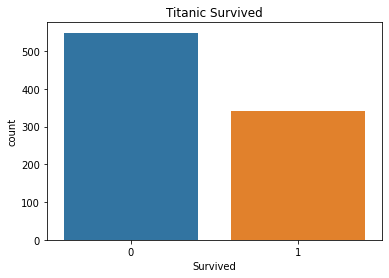

In [23]:
sns.countplot('Survived', data=titanic)
plt.title("Titanic Survived")
plt.show()

From the above plot, the number of people survived are less than the people who are died. Now lets see what percentage of passengers survived using a pie plot.

<AxesSubplot:ylabel='Survived'>

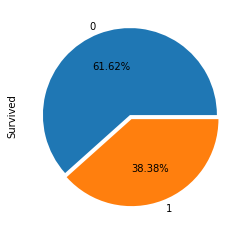

In [24]:
explode = [0, 0.05]
titanic['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

From the above chart, 38% of the passengers are only survived based on this training data.

# Bivariate Analysis


Lets analyse the 'Pclass' since it is highly correlated with the target variable.

In [25]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
titanic.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Above result shows the breakup of passengers based on Pclass and Survived. But still we cannot see the percentage of survival with this data. So lets plot Pclass along with the Survived to have a better picture of the data.

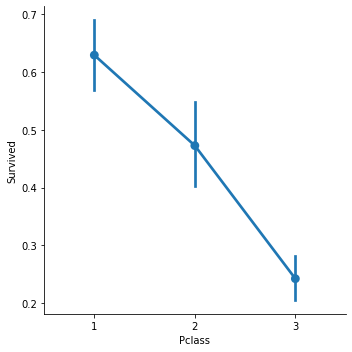

In [27]:
sns.catplot(x='Pclass', y='Survived', data=titanic, kind='point')

What you see above is called a Point plot. It shows point estimates and confidence intervals. The point estimates indicate the central tendency of a variable while the confidence intervals indicate the uncertainty around this estimate. From the above plot, it is very clear that the first Class passengers had the highest Survival rate when compared to the other class passengers.

Let's see one more example of bivariate analysis by comparing Sex and Fare.

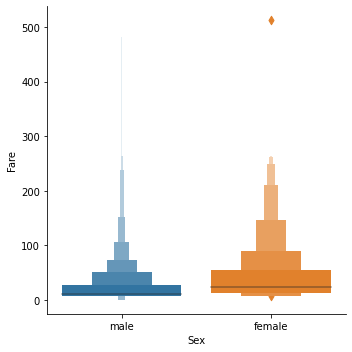

In [28]:
sns.catplot(x='Sex', y='Fare', data=titanic, kind='boxen')

The enhanced box plot shown above indicates that the fare of "Female" passengers is on average higher than male passengers. It could be because of the additional services offered to female passengers.

## Multivariate Analysis

Multivariate Analysis helps us in mining for a deeper understanding of the relationship between variables when compared to Bivariate Analysis. The latter assumes that the relationship between a variable X and the target variable Y is independent of the rest of the variables, (i.e) f(X, Y) doesn't depend on a third variable Z. This limiting assumption could be dangerous. For instance, "Women and children first" is a naval code of conduct followed since 1852, whereby the lives of women and children were to be saved first in a life-threatening situation. As we already know, "Survival" is highly correlated with "Sex". But a third variable "Age" (child) influences the relationship between "Survival" and "Sex". 

First, let us see analyze the data with three variables, and then we will learn to model the relationship between four variables. Let's compare 'Sex' and 'Age'.

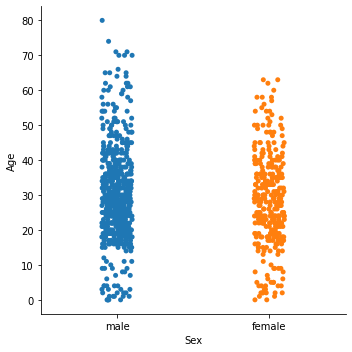

In [29]:
sns.catplot(x='Sex', y='Age', data=titanic)

From the above graph, we can see that some of the very old men were travelling. But we couldnt get much information by comparing age and sex.

So lets include the third parameter Pclass and try to understand it better.

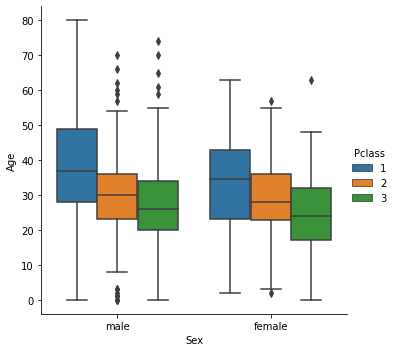

In [30]:
sns.catplot(x='Sex', y='Age', data=titanic, kind='box', hue='Pclass')

From the above plot, most of the older people were travelling in first class. It may be beacause they were rich. The youngsters who are aged in between 25 and 35 were mostly travelling in second and third class.

May be we can see it better using violin plot.

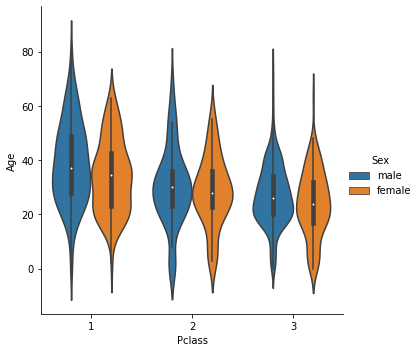

In [31]:
 sns.catplot(x='Pclass', y='Age', data=titanic, kind='violin', hue='Sex')

Now lets see how to compare four variables. Lets take 'Age' and 'Fare'. Note that both are continuous variables.

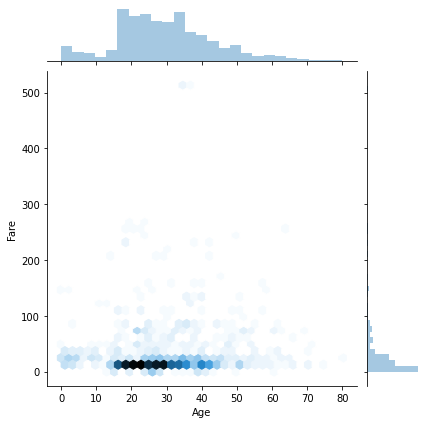

In [32]:
sns.jointplot(x='Age', y='Fare', data=titanic, kind='hexx')

The average passengers were aged in between 20 and 40, the average Fare is about $20 to $50. We couldnt understand much from the above plot. Below is just the better view of the data where we included Sex and Pclass along with Age and Fare.

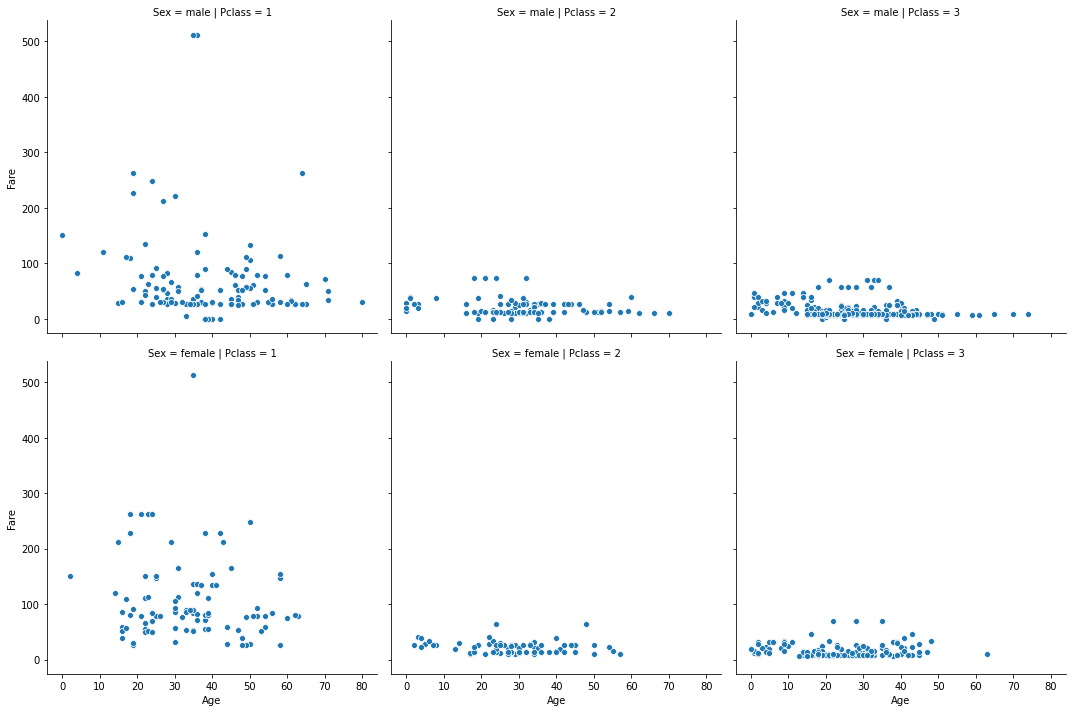

In [33]:
sns.relplot(x='Age', y='Fare', data=titanic, row='Sex', col='Pclass')

From the above plots, we observe that there were more male passengers who traveled in first-class than women passengers. The Fare for first-class female passengers was higher than male passengers. There is no big difference in Fare for second and third-class passengers. Very few children traveled in first class. The third class had more children. Most of the second and third-class passengers were aged between 20 and 40. 

We have come to the end of my Exploratory Analysis of the Titanic Survival Problem. 

I will explain the model building and evaluation in my next write-up.